# import and data check

In [1]:
import os
import pandas as pd

games = pd.read_csv('vgames2.csv', index_col=0)
games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


data type 확인

In [2]:
games.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

결측치 확인

In [3]:
games.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

# 전처리

결측치 처리<br>
Year가 nan인 경우 drop<br>
Genre가 nan인 경우 unknown으로 가정<br>
Publisher가 nan인 경우 unknown으로 가정

In [4]:
unknown = ['Genre','Publisher']
games[unknown] = games[unknown].fillna('Unknown')
games.dropna(inplace=True)
games.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

Year가 한자리수 또는 두자리수인 경우 네자리수로 통일

In [5]:
games['Year'] = games['Year'].apply(lambda x: x+2000 if x<22 else x+1900 if x<100 else x)

sales 부분 문자형과 섞인 숫자형 처리 및 data type 변환

In [6]:
sales = games.columns[-4:]
games[sales] = games[sales].replace('M','',regex=True)
games[sales] = games[sales].applymap(lambda x: float(x[:-1])/1000 if 'K' in x else float(x))

전처리 후 data type 확인

In [7]:
games.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

# 지역에 따라서 선호하는 게임 장르
1) 전체기간

In [8]:
Genre = games.pivot_table(index='Genre', values=sales, aggfunc='sum')
Genre

,EU_Sales,JP_Sales,NA_Sales,Other_Sales
Genre,,,,
Action,513.64,156.61,858.78,183.99
Adventure,63.71,51.89,101.92,16.70
Fighting,99.90,87.14,220.35,36.15
Misc,210.20,104.18,400.29,72.74
Platform,200.65,130.53,445.38,51.45
Puzzle,50.48,56.24,121.58,12.44
Racing,235.03,56.32,354.70,76.51
Role-Playing,183.10,342.93,318.76,56.73
Shooter,310.23,38.18,574.48,101.86


비교를 쉽게 하기 위해 scale 조정

In [9]:
from sklearn.preprocessing import StandardScaler

Z = StandardScaler().fit_transform(Genre)
Genre_fit = pd.DataFrame(Z,index=Genre.index,columns=Genre.columns).sort_values(by='NA_Sales',ascending=False)
Genre_fit

,EU_Sales,JP_Sales,NA_Sales,Other_Sales
Genre,,,,
Action,2.339523,0.710887,2.164686,2.420009
Sports,1.322903,0.442234,1.375668,1.406445
Shooter,0.890090,-0.745248,0.993437,0.808003
Platform,0.109258,0.390225,0.461575,-0.181418
Misc,0.177309,0.066243,0.275815,0.236451
Racing,0.354239,-0.522211,0.087995,0.310446
Role-Playing,-0.015797,3.001751,-0.060069,-0.077785
Fighting,-0.608653,-0.143269,-0.465495,-0.481719
Simulation,-0.514095,-0.433438,-0.625836,-0.576520


시각화

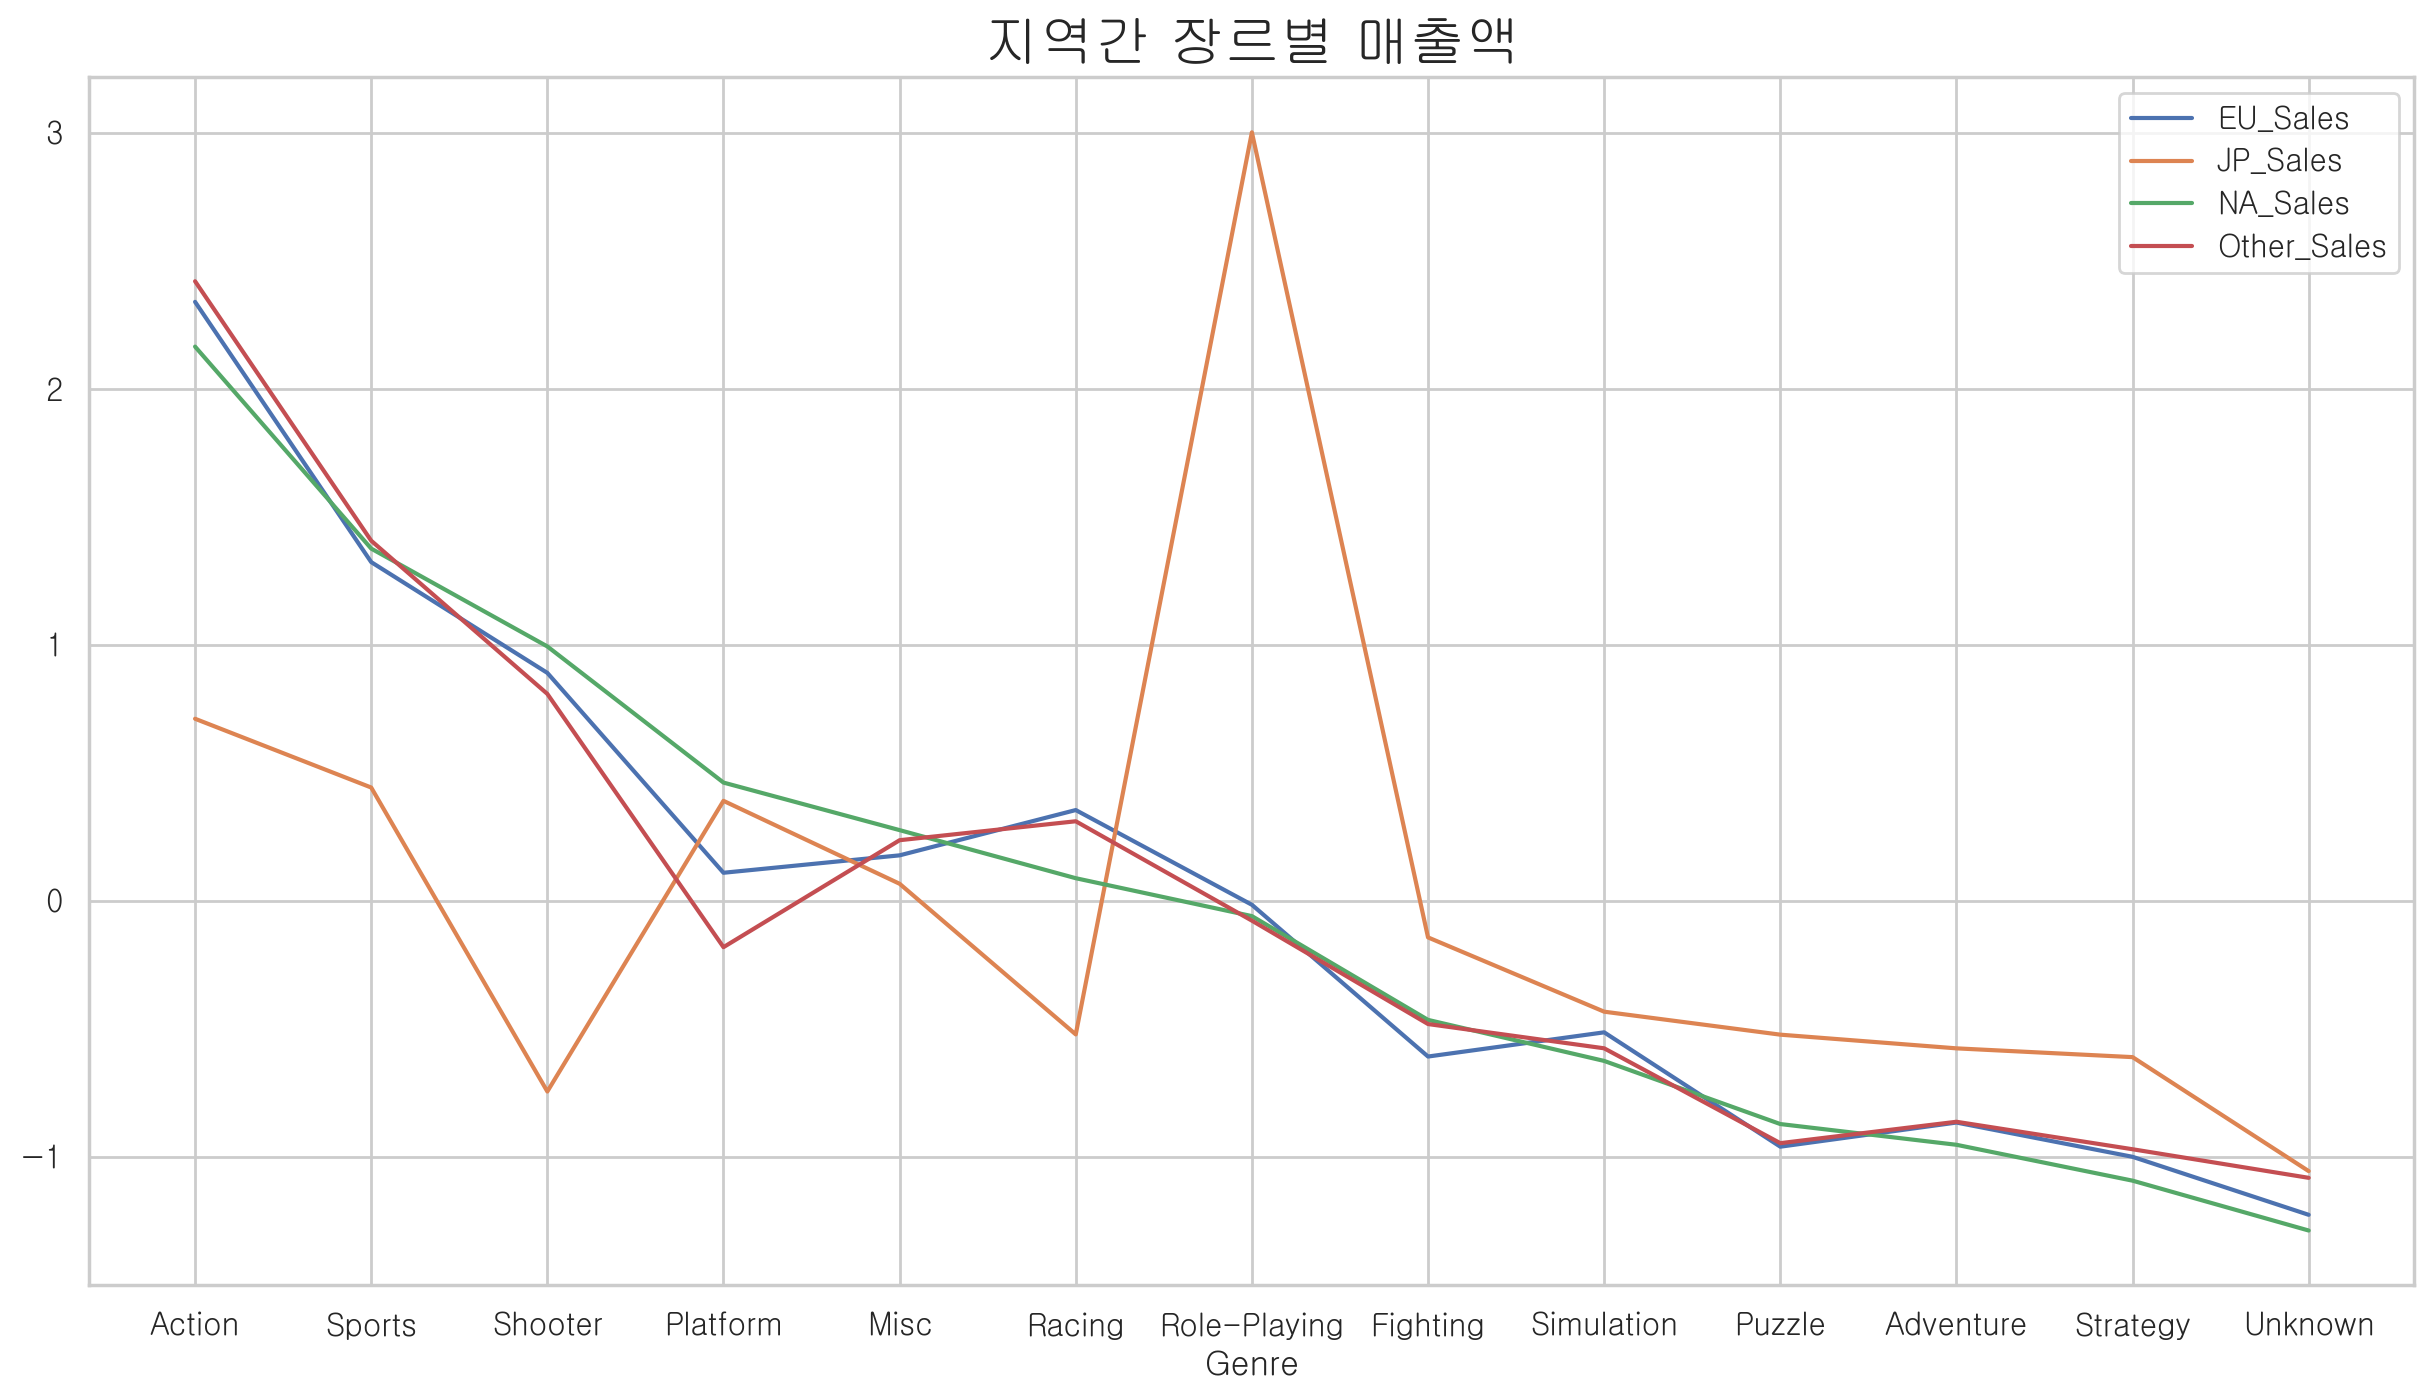

In [116]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
import seaborn as sns
sns.set(style='whitegrid')

%matplotlib inline

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

fig, ax = plt.subplots(figsize=(15,8),dpi=200)
Genre_fit.plot(ax=ax)
plt.title('지역간 장르별 매출액',fontsize=20)
plt.xticks(np.arange(13),Genre_fit.index)

plt.show()

- 대부분 Action, Sports, Shooter ... 순으로 선호하는 비슷한 경향을 보임
- 일본의 경우 다른 지역에 비해 Shooter, Racing의 비중이 낮고 Role-Playing의 선호도가 상당히 높은 것을 알 수 있음
- 일본 시장을 공략할 경우 다른 방식의 접근이 필요할 것으로 생각됨

2) 2010년 이후

In [11]:
trend_by_year = games.pivot_table(index='Year',columns='Genre',values=sales, aggfunc='sum', fill_value=0)

In [92]:
trend_by_year_NA = trend_by_year['NA_Sales'].iloc[30:]
trend_by_year_EU = trend_by_year['EU_Sales'].iloc[30:]
trend_by_year_JP = trend_by_year['JP_Sales'].iloc[30:]
trend_by_year_Other = trend_by_year['Other_Sales'].iloc[30:]

- NA
|   Year |   Action |   Adventure |   Fighting |   Misc |   Platform |   Puzzle |   Racing |   Role-Playing |   Shooter |   Simulation |   Sports |   Strategy |   Unknown |
|-------:|---------:|------------:|-----------:|-------:|-----------:|---------:|---------:|---------------:|----------:|-------------:|---------:|-----------:|----------:|
|   2010 |    60.32 |        6.3  |       7.46 |  53.18 |      17.16 |     6.55 |    14.26 |          28.55 |     43.1  |        11.23 |    48.15 |       5.78 |      2.2  |
|   2011 |    53.73 |        5.89 |      11.49 |  32.07 |      13.06 |     1.68 |    14.61 |          19.78 |     49.82 |         7.49 |    27.45 |       3.36 |      0.63 |
|   2012 |    52.16 |        1.78 |       4.34 |  10.99 |       7.32 |     0.3  |     4.38 |          17.85 |     35.06 |         3.09 |    16.4  |       0.94 |      0.35 |
|   2013 |    53.79 |        1.63 |       3.18 |  12.53 |      11.62 |     0.19 |     4.21 |           7.92 |     30.7  |         2.26 |    19.18 |       2.39 |      5.17 |
|   2014 |    38.73 |        1.94 |       6.89 |   9.43 |       3.02 |     0.62 |     5.86 |          13.56 |     30.72 |         1.22 |    19.82 |       0.16 |      0    |
|   2015 |    21.83 |        2.76 |       3.6  |   4.81 |       2.5  |     0.05 |     1.97 |          13.35 |     30.79 |         1.13 |    18.46 |       0.57 |      1    |
|   2016 |     5.87 |        0.34 |       1.6  |   0.22 |       0.79 |     0    |     0.33 |           1.39 |      7.44 |         0    |     4.57 |       0.11 |      0    |
|   2017 |     0    |        0    |       0    |   0    |       0    |     0    |     0    |           0    |      0    |         0    |     0    |       0    |      0    |
|   2020 |     0    |        0    |       0    |   0    |       0    |     0    |     0    |           0    |      0    |         0.27 |     0    |       0    |      0    |
<br>
- EU
|   Year |   Action |   Adventure |   Fighting |   Misc |   Platform |   Puzzle |   Racing |   Role-Playing |   Shooter |   Simulation |   Sports |   Strategy |   Unknown |
|-------:|---------:|------------:|-----------:|-------:|-----------:|---------:|---------:|---------------:|----------:|-------------:|---------:|-----------:|----------:|
|   2010 |    35.75 |        5.24 |       4.22 |  23.58 |       8.55 |     3.2  |    14.52 |          13.7  |     23.9  |         6.95 |    29.03 |       4.51 |      3.58 |
|   2011 |    41.04 |        4.69 |       5.57 |  14.04 |       8.86 |     2.19 |    13.52 |          14.1  |     35.31 |         5.21 |    19.86 |       2.91 |      0.14 |
|   2012 |    42.26 |        1.31 |       2.43 |   6.63 |       5.88 |     0.42 |     7.58 |          11.97 |     26.34 |         3.62 |     8.83 |       0.99 |      0.52 |
|   2013 |    45.21 |        1.97 |       1.95 |   7.5  |       9.09 |     0.48 |     6.32 |           4.89 |     23.15 |         3.56 |    15.16 |       2.47 |      4.05 |
|   2014 |    40.48 |        2.11 |       3.07 |   8.87 |       3.63 |     0.38 |     7.7  |          11.24 |     25.81 |         3.44 |    18.7  |       0.22 |      0    |
|   2015 |    23.89 |        3.36 |       2.38 |   3.71 |       1.81 |     0.11 |     4.74 |          12.52 |     24.23 |         2.51 |    16.69 |       0.98 |      0.78 |
|   2016 |     6.36 |        0.39 |       1.15 |   0.09 |       0.87 |     0    |     1.14 |           1.29 |      7.7  |         0.09 |     7.36 |       0.32 |      0    |
|   2017 |     0    |        0    |       0    |   0    |       0    |     0    |     0    |           0    |      0    |         0    |     0    |       0    |      0    |
|   2020 |     0    |        0    |       0    |   0    |       0    |     0    |     0    |           0    |      0    |         0    |     0    |       0    |      0    |
<br>
- JP
|   Year |   Action |   Adventure |   Fighting |   Misc |   Platform |   Puzzle |   Racing |   Role-Playing |   Shooter |   Simulation |   Sports |   Strategy |   Unknown |
|-------:|---------:|------------:|-----------:|-------:|-----------:|---------:|---------:|---------------:|----------:|-------------:|---------:|-----------:|----------:|
|   2010 |     8.58 |        3.58 |       1.52 |   4.2  |       3.68 |     0.49 |     1.04 |          23.67 |      2.12 |         1.66 |     4.42 |       2.02 |      2.51 |
|   2011 |    10.82 |        3.78 |       2.93 |   4.74 |       3.49 |     0.77 |     3.12 |          14.43 |      2.69 |         1.23 |     3.08 |       1.9  |      0.06 |
|   2012 |    12.25 |        2.37 |       1.79 |   3.66 |       3.84 |     0.96 |     0.2  |          14.39 |      2.62 |         5.86 |     2.59 |       1.11 |      0.1  |
|   2013 |    10.88 |        2.22 |       1.28 |   3.58 |       2.08 |     0.25 |     0.54 |          15.52 |      1.73 |         2.2  |     2.15 |       0.82 |      4.34 |
|   2014 |     6.5  |        1.36 |       4.8  |   2.36 |       1.26 |     0.41 |     1.46 |          17.71 |      1.08 |         0.37 |     1.6  |       0.55 |      0    |
|   2015 |    15.56 |        1.04 |       0.79 |   2.1  |       1.29 |     0.52 |     0.28 |           6.71 |      2.69 |         1.58 |     0.72 |       0.15 |      0.29 |
|   2016 |     5.79 |        0.97 |       0.64 |   0.81 |       0.11 |     0    |     0.01 |           3.63 |      0.61 |         0.3  |     0.78 |       0.05 |      0    |
|   2017 |     0.01 |        0    |       0    |   0    |       0    |     0    |     0    |           0.04 |      0    |         0    |     0    |       0    |      0    |
|   2020 |     0    |        0    |       0    |   0    |       0    |     0    |     0    |           0    |      0    |         0    |     0    |       0    |      0    |
<br>
- Other
|   Year |   Action |   Adventure |   Fighting |   Misc |   Platform |   Puzzle |   Racing |   Role-Playing |   Shooter |   Simulation |   Sports |   Strategy |   Unknown |
|-------:|---------:|------------:|-----------:|-------:|-----------:|---------:|---------:|---------------:|----------:|-------------:|---------:|-----------:|----------:|
|   2010 |    12.85 |        1.45 |       1.68 |   7.44 |       2.59 |     0.91 |     5.11 |           4.64 |      8.32 |         2.22 |    10.42 |       1.51 |      0.76 |
|   2011 |    13.41 |        1.52 |       2.12 |   4.92 |       2.71 |     0.46 |     3.72 |           5.01 |     11.53 |         1.4  |     6.67 |       0.86 |      0.06 |
|   2012 |    14.14 |        0.44 |       0.97 |   1.65 |       1.52 |     0.06 |     2.27 |           3.56 |      8.82 |         0.8  |     3.08 |       0.29 |      0.22 |
|   2013 |    15.33 |        0.79 |       0.82 |   2.05 |       2.3  |     0.08 |     1.95 |           2.21 |      7.15 |         0.66 |     5.05 |       0.64 |      0.79 |
|   2014 |    13.3  |        0.68 |       1.39 |   3.07 |       0.96 |     0.1  |     1.69 |           3.38 |      8.38 |         0.51 |     6.52 |       0.04 |      0    |
|   2015 |     6.97 |        0.85 |       1.01 |   1.04 |       0.45 |     0.01 |     0.93 |           3.85 |      8.41 |         0.39 |     5.62 |       0.12 |      0.36 |
|   2016 |     1.83 |        0.11 |       0.46 |   0.03 |       0.31 |     0    |     0.19 |           0.44 |      2.42 |         0    |     1.92 |       0.04 |      0    |
|   2017 |     0    |        0    |       0    |   0    |       0    |     0    |     0    |           0    |      0    |         0    |     0    |       0    |      0    |
|   2020 |     0    |        0    |       0    |   0    |       0    |     0    |     0    |           0    |      0    |         0.02 |     0    |       0    |      0    |

data를 확인했을 때 17,20년도는 이상치라고 판단하여 제외<br>
장르별 매출액의 합으로 가장 인기있는 3종목 선택

In [105]:
best3_NA = trend_by_year_NA.sum().sort_values(ascending=False).head(3).index
best3_EU = trend_by_year_EU.sum().sort_values(ascending=False).head(3).index
best3_JP = trend_by_year_JP.sum().sort_values(ascending=False).head(3).index
best3_Other = trend_by_year_Other.sum().sort_values(ascending=False).head(3).index

- NA
|   Year |   Action |   Shooter |   Sports |
|-------:|---------:|----------:|---------:|
|   2010 |    60.32 |     43.1  |    48.15 |
|   2011 |    53.73 |     49.82 |    27.45 |
|   2012 |    52.16 |     35.06 |    16.4  |
|   2013 |    53.79 |     30.7  |    19.18 |
|   2014 |    38.73 |     30.72 |    19.82 |
|   2015 |    21.83 |     30.79 |    18.46 |
|   2016 |     5.87 |      7.44 |     4.57 |
<br>
- EU
|   Year |   Action |   Shooter |   Sports |
|-------:|---------:|----------:|---------:|
|   2010 |    35.75 |     23.9  |    29.03 |
|   2011 |    41.04 |     35.31 |    19.86 |
|   2012 |    42.26 |     26.34 |     8.83 |
|   2013 |    45.21 |     23.15 |    15.16 |
|   2014 |    40.48 |     25.81 |    18.7  |
|   2015 |    23.89 |     24.23 |    16.69 |
|   2016 |     6.36 |      7.7  |     7.36 |
<br>
- JP
|   Year |   Role-Playing |   Action |   Misc |
|-------:|---------------:|---------:|-------:|
|   2010 |          23.67 |     8.58 |   4.2  |
|   2011 |          14.43 |    10.82 |   4.74 |
|   2012 |          14.39 |    12.25 |   3.66 |
|   2013 |          15.52 |    10.88 |   3.58 |
|   2014 |          17.71 |     6.5  |   2.36 |
|   2015 |           6.71 |    15.56 |   2.1  |
|   2016 |           3.63 |     5.79 |   0.81 |
<br>
- Other
|   Year |   Action |   Shooter |   Sports |
|-------:|---------:|----------:|---------:|
|   2010 |    12.85 |      8.32 |    10.42 |
|   2011 |    13.41 |     11.53 |     6.67 |
|   2012 |    14.14 |      8.82 |     3.08 |
|   2013 |    15.33 |      7.15 |     5.05 |
|   2014 |    13.3  |      8.38 |     6.52 |
|   2015 |     6.97 |      8.41 |     5.62 |
|   2016 |     1.83 |      2.42 |     1.92 |

시각화

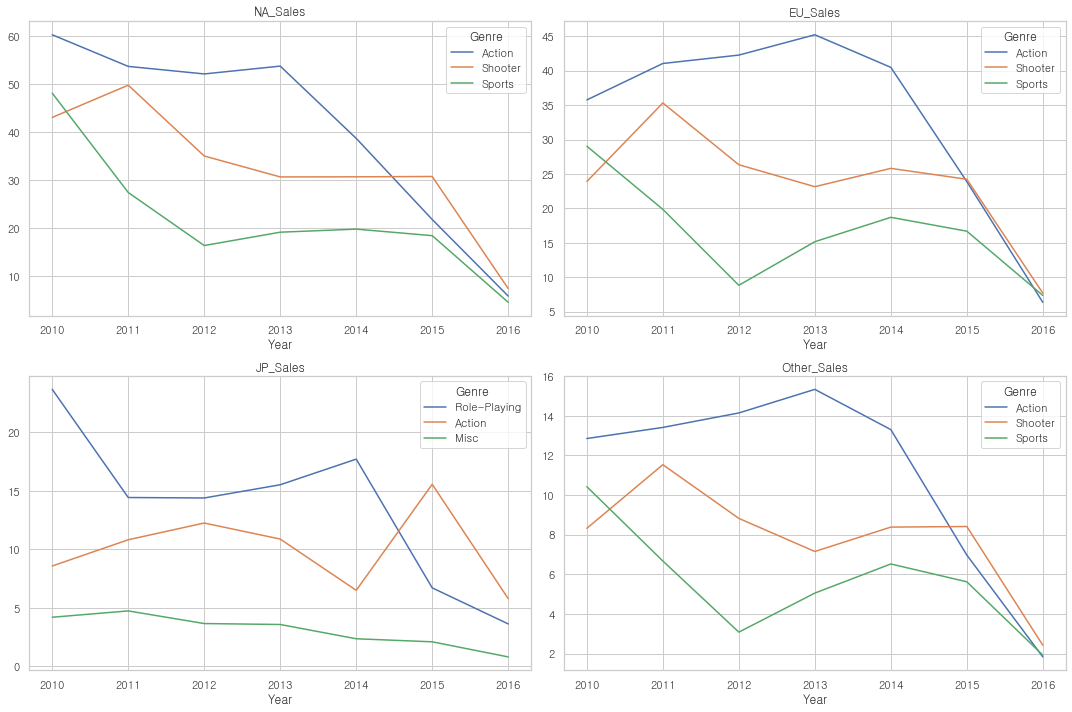

In [107]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

best3 = [best3_NA,best3_EU,best3_JP,best3_Other]

for i in range(4):
    x, y = int(i/2), i%2
    trend_by_year[sales[i]].iloc[30:].loc[trend_by_year[sales[i]].iloc[30:].index<2017,best3[i]].plot(ax=ax[x,y],title=sales[i])


plt.tight_layout()
plt.show()

- NA, EU, Other 지역에서는 Action, Sports, Shooter 장르순으로 선호하는 경향을 보였으나 2014~2015년을 분기점으로 Shooter가 Action을 앞지른 것으로 보임<br>
- JP 지역의 전체적인 경향을 봤을 때는 Role-Playing 장르가 압도적이었으나 최근 트렌드를 보았을 때는 Action 장르가 가장 인기 있는 것을 알 수 있음<br>
- 지역의 특성에 맞춰 접근해야 될 것으로 보임

# 출고량이 높은 게임에 대한 분석 및 시각화
1) 전체 기간

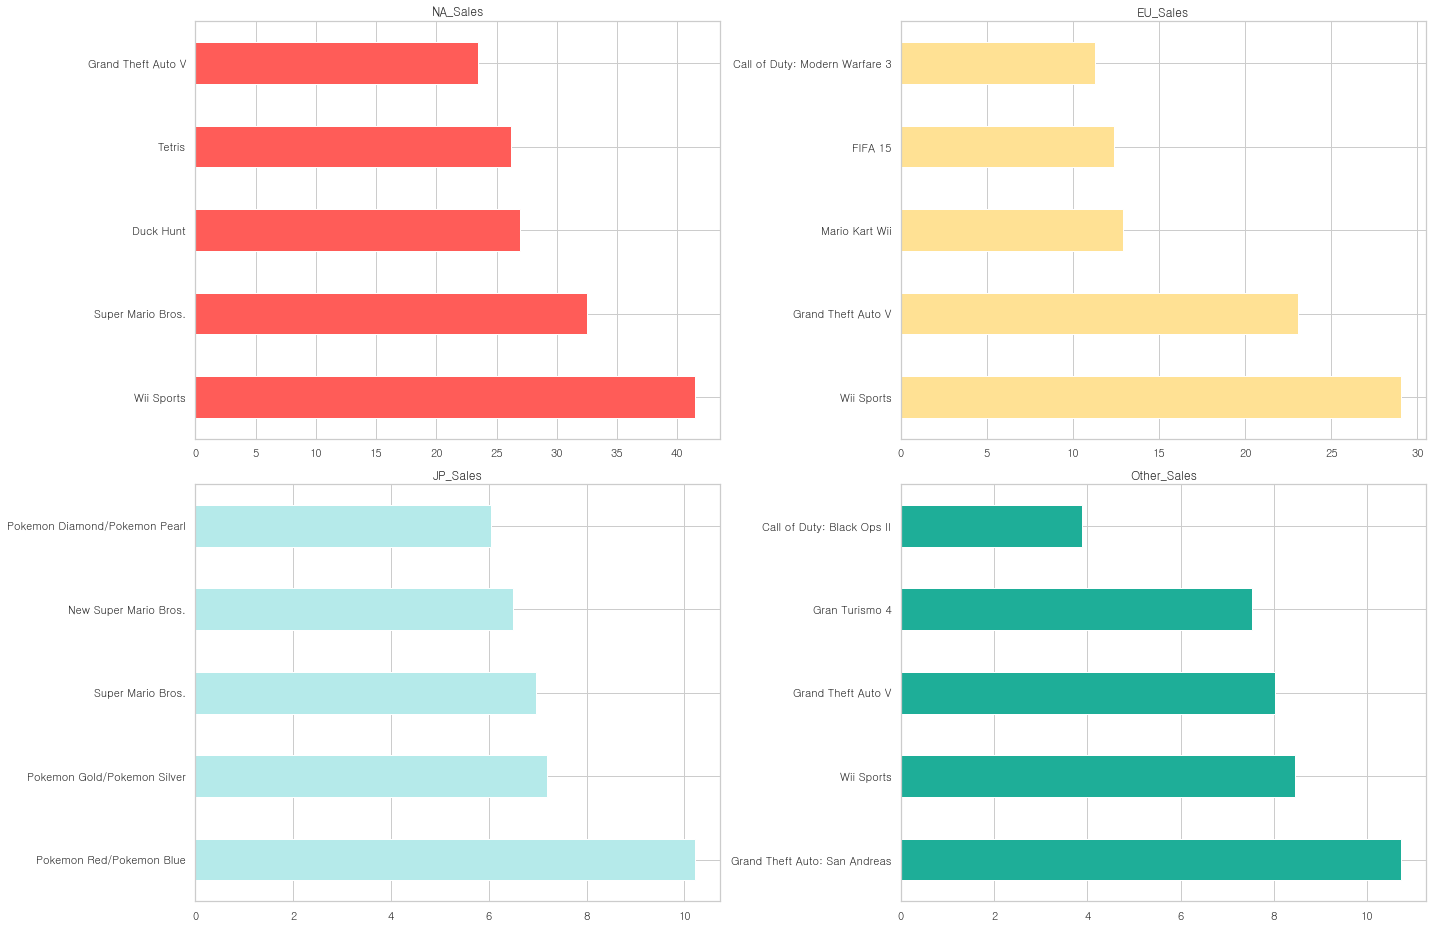

In [36]:
fig, ax = plt.subplots(2,2,figsize=[20,13])

colors = ['#FF5C58','#FFE194','#B5EAEA','#1EAE98']

for i, color in enumerate(colors):
    
    x, y = int(i/2), i%2
    
    (games.pivot_table(index='Name',values=sales,aggfunc='sum').sort_values(by=sales[i],ascending=False)[sales[i]]
     .head().plot(kind='barh',ax=ax[x,y],color=color,title=sales[i]))
    
    ax[x,y].set_ylabel('')


plt.tight_layout()
plt.show()

- NA<br>
Wii Sports, Super Mario Bros., Duck Hunt, Tetris, Grand Theft Auto V
<br>
<br>
- EU<br>
Wii Sports, Grand Theft Auto V, Mario Kart Wii, FIFA 15, Call of Duty: Modern Warfare 3
<br>
<br>
- JP<br>
Pokemon Red/Pokemon Blue, Pokemon Gold/Pokemon Silver, Super Mario Bros., New Super Mario Bros., Pokemon Diamond/Pokemon Pearl
<br>
<br>
- Other<br>
Grand Theft Auto: San Andreas, Wii Sports, Grand Theft Auto V, Gran Turismo 4, Call of Duty: Black Ops II

- 전체기간동안 Wii Sports가 세계적으로 높은 판매량을 보일 때, 일본에서는 자국 게임임에도 순위권안에 들지 못하였음<br>
→ 관련자료 조사결과 Wii Sports가 세계적으로 가장 높은 판매량을 기록한 것은 맞으나 일본을 제외한 국가에서는 Wii를 샀을 때 같이 동봉되는 게임이라는 사실이 큰 영향을 미쳤을 것으로 판단됨
- 세계적으로(일본제외) GTA게임이 흥행한 것을 알 수 있음
- 일본지역에서는 Pokemon Series, Supermario Series 게임의 지분이 굉장히 큼

2) 2014년 이후

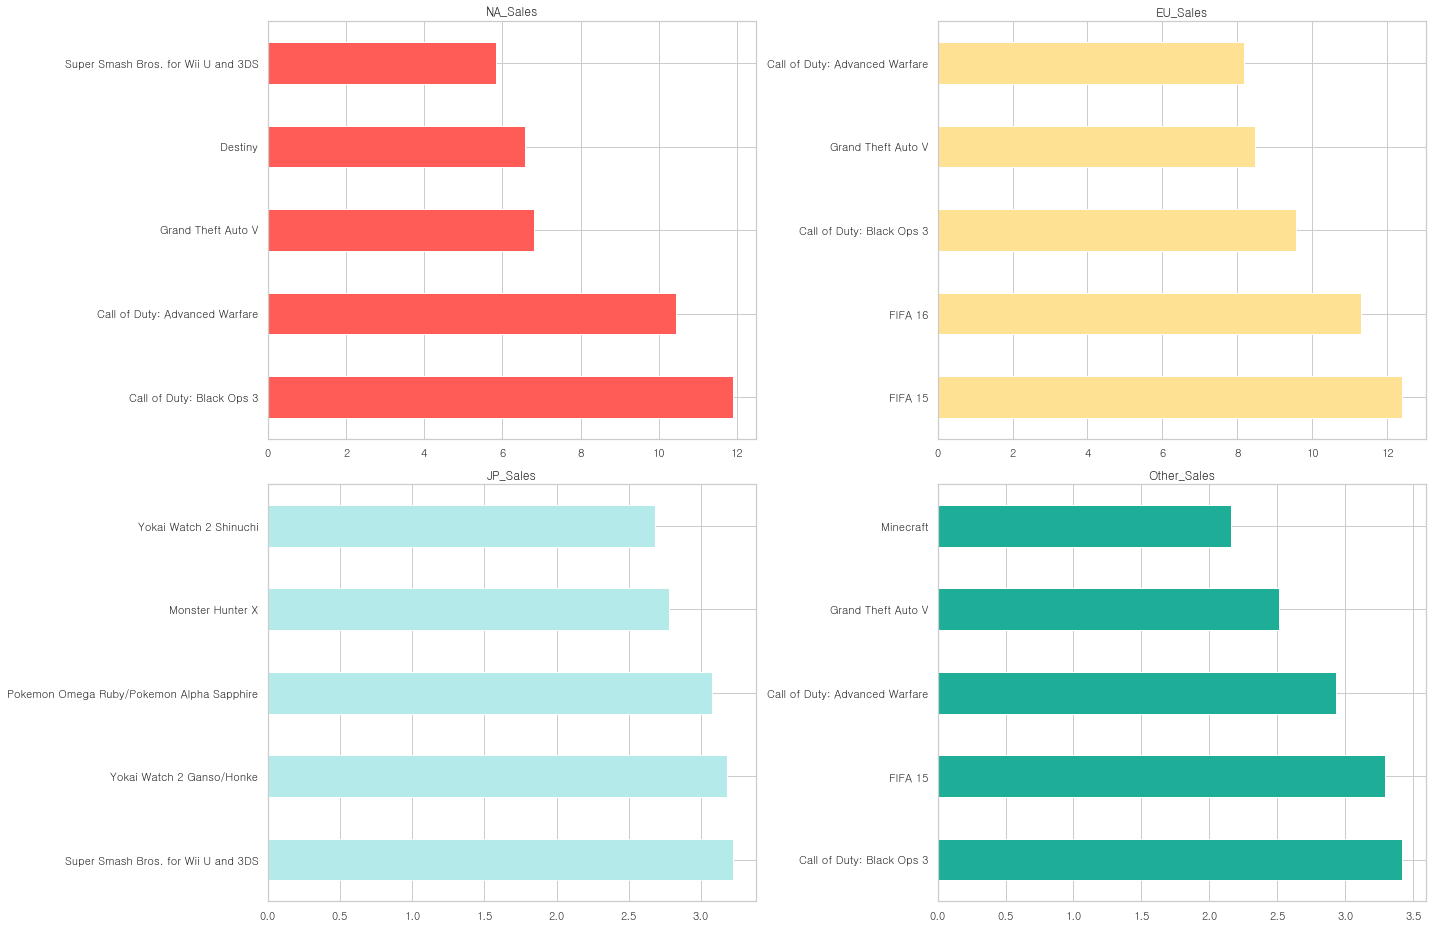

In [124]:
fig, ax = plt.subplots(2,2,figsize=[20,13])

for i, color in enumerate(colors):
    
    x, y = int(i/2), i%2
    
    (games[games['Year']>=2014].pivot_table(index='Name',values=sales,aggfunc='sum').sort_values(by=sales[i],ascending=False)[sales[i]]
     .head().plot(kind='barh',ax=ax[x,y],color=color, title=sales[i]))

    ax[x,y].set_ylabel('')

plt.tight_layout()
plt.show()

- NA<br>
Call of Duty: Black Ops 3, Call of Duty: Advanced Warfare, Grand Theft Auto V, Destiny, Super Smash Bros. for Wii U and 3DS
<br>
<br>
- EU<br>
FIFA 15, FIFA 16, Call of Duty: Black Ops 3, Grand Theft Auto V, Call of Duty: Advanced Warfare,
<br>
<br>
- JP<br>
Super Smash Bros. for Wii U and 3DS, Yokai Watch 2 Ganso/Honke, Pokemon Omega Ruby/Pokemon Alpha Sapphire, Monster Hunter X, Yokai Watch 2 Shinuchi
<br>
<br>
- Other<br>
Call of Duty: Black Ops 3, FIFA 15, Call of Duty: Advanced Warfare, Grand Theft Auto V, Minecraft

- 전체 기간과 비교하였을 때(일본 제외), Shooter 장르(Call of Duty Series)가 상당히 많이 보임
- 일본의 경우 Super Mario 시리즈와 Pokemon 시리즈는 여전히 꾸준한 성적을 내고 있으며, 순위권 내에 Action 장르(Monster Hunter X)가 등장한 것을 알 수 있음

# 2010년 이후 출고량이 높은 플랫폼 분석 및 시각화

In [65]:
platform = games.pivot_table(index='Year',columns='Platform',values='NA_Sales',aggfunc='count',fill_value=0)
platform.iloc[30:-2]

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,
2010.0,0,0,0,0,326,0,0,0,0,0,...,0,0,0,0,0,254,0,182,0,0
2011.0,0,0,116,0,153,0,0,0,0,0,...,0,0,0,0,0,144,0,206,0,0
2012.0,0,0,93,0,25,0,0,0,0,0,...,0,0,0,0,0,32,32,106,0,0
2013.0,0,0,91,0,9,0,0,0,0,0,...,0,0,0,0,0,12,42,75,0,19
2014.0,0,0,79,0,1,0,0,0,0,0,...,0,0,0,0,0,6,31,65,0,61
2015.0,0,0,86,0,0,0,0,0,0,0,...,0,0,0,0,0,4,28,40,0,79
2016.0,0,0,35,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,8,0,54


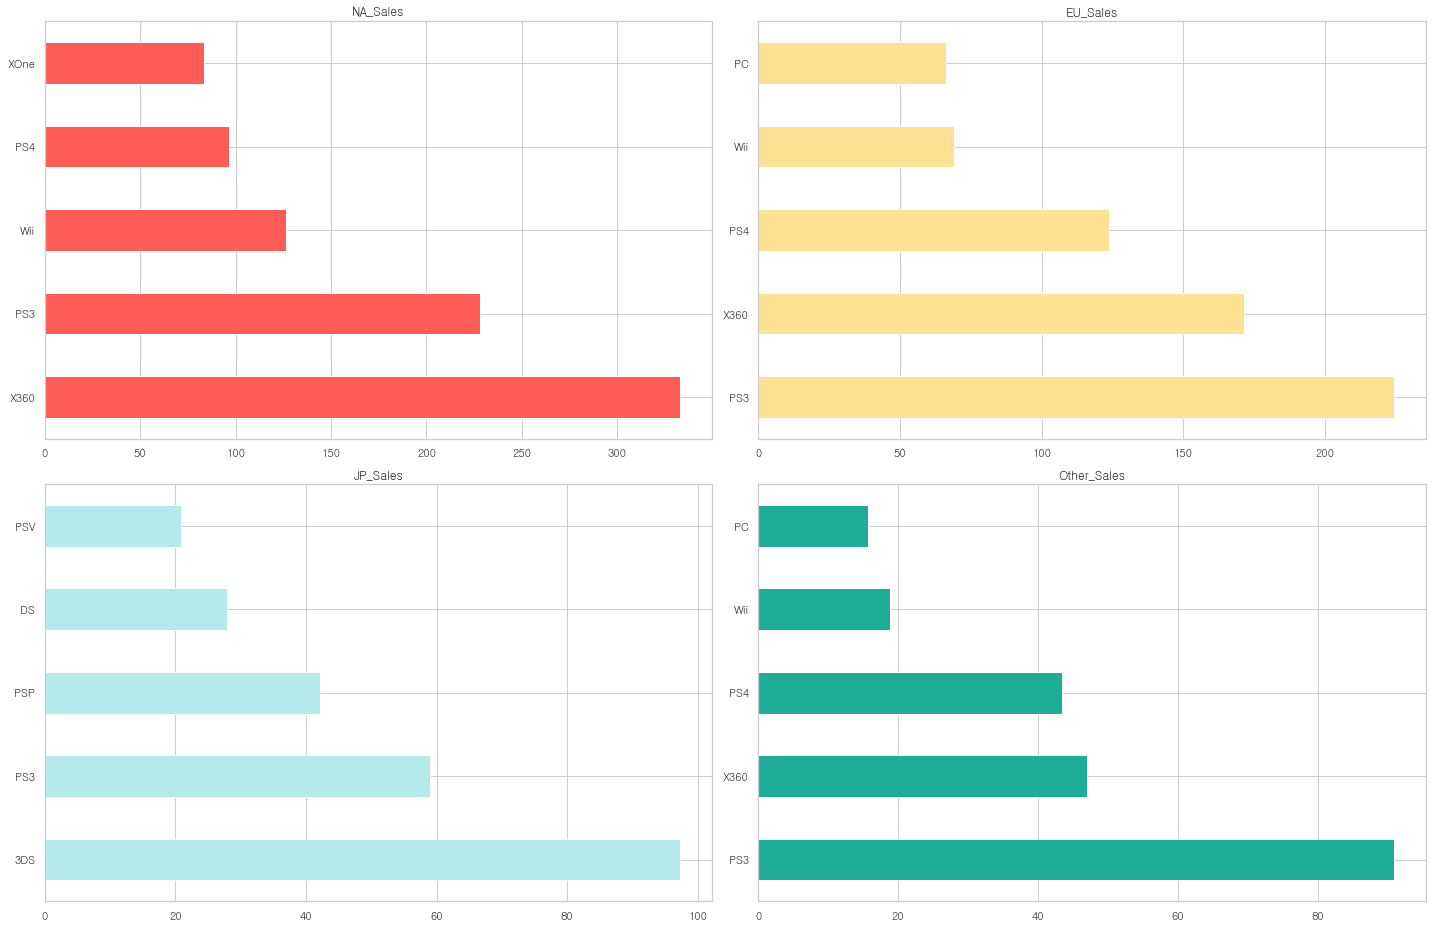

In [118]:
fig, ax = plt.subplots(2,2,figsize=[20,13])

for i, color in enumerate(colors):
    
    x, y = int(i/2), i%2
    
    (games[games['Year']>=2010].pivot_table(index='Platform',values=sales,aggfunc='sum').sort_values(by=sales[i],ascending=False)[sales[i]]
     .head().plot(kind='barh',ax=ax[x,y],color=color, title=sales[i]))

    ax[x,y].set_ylabel('')

plt.tight_layout()
plt.show()

- NA<br>
X360, PS3, Wii, PS4, XOne 순으로 출고량이 높음
<br>
<br>
- EU<br>
PS3, X360, PS4, Wii, PC 순으로 출고량이 높음
<br>
<br>
- JP<br>
3DS, PS3, PSP, DS, PSV 순으로 출고량이 높음
<br>
<br>
- Other<br>
PS3, X360, PS4, Wii, PC 순으로 출고량이 높음
<br>
<br>
- 하지만 최근 출시되는 게임들이 어떤 플랫폼을 통하여 출시되는지 알아야함

2010년 이후 플랫폼별 출시된 게임 분석

In [129]:
platform_2010_2016 = platform.iloc[30:-2].copy()

platform_name = [index for index, value in platform_2010_2016.sum().iteritems() if value != 0]

- 2010년 이후 출시된 게임의 플랫폼<br>
['3DS', 'DS', 'PC', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

Platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
Year,,,,,,,,,,,,
2010.0,0,326,90,38,181,0,188,0,254,0,182,0
2011.0,116,153,140,7,216,0,139,18,144,0,206,0
2012.0,93,25,61,0,148,0,106,54,32,32,106,0
2013.0,91,9,38,0,127,16,54,63,12,42,75,19
2014.0,79,1,44,0,108,75,10,102,6,31,65,61
2015.0,86,0,50,0,74,137,3,113,4,28,40,79
2016.0,35,0,38,0,32,107,0,60,0,10,8,54


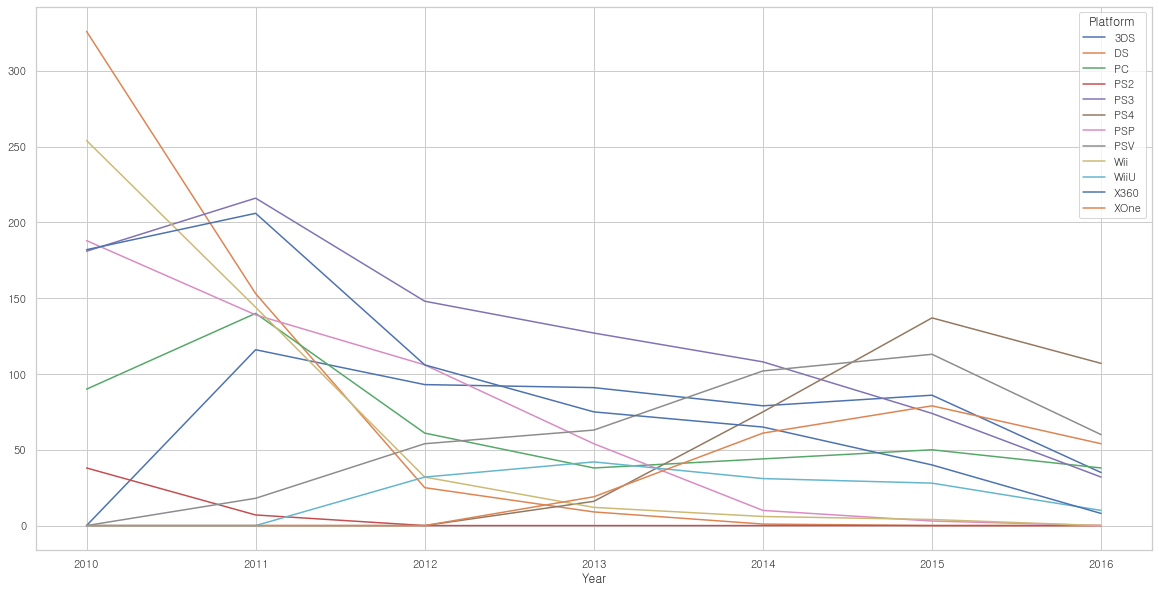

In [67]:
display(platform_2010_2016[platform_name])
platform_2010_2016[platform_name].plot(figsize=(20,10));

- X360, Wii, DS, PS3용으로 출시되는 게임이 수가 2010년대 초반에는 높았지만 시간이 지날 수록 출시되는 게임의 수가 줄어드는 것으로 보이며, 이는 후속 플랫폼의 등장으로 인하여 세대 교체가 일어나는 것으로 판단됨
- 따라서 가장 최근 트렌드를 확인하기 위하여 2014년 이후의 자료로만 분석할 필요가 있음

2014년 이후의 지역별 플랫폼 출고량 분석

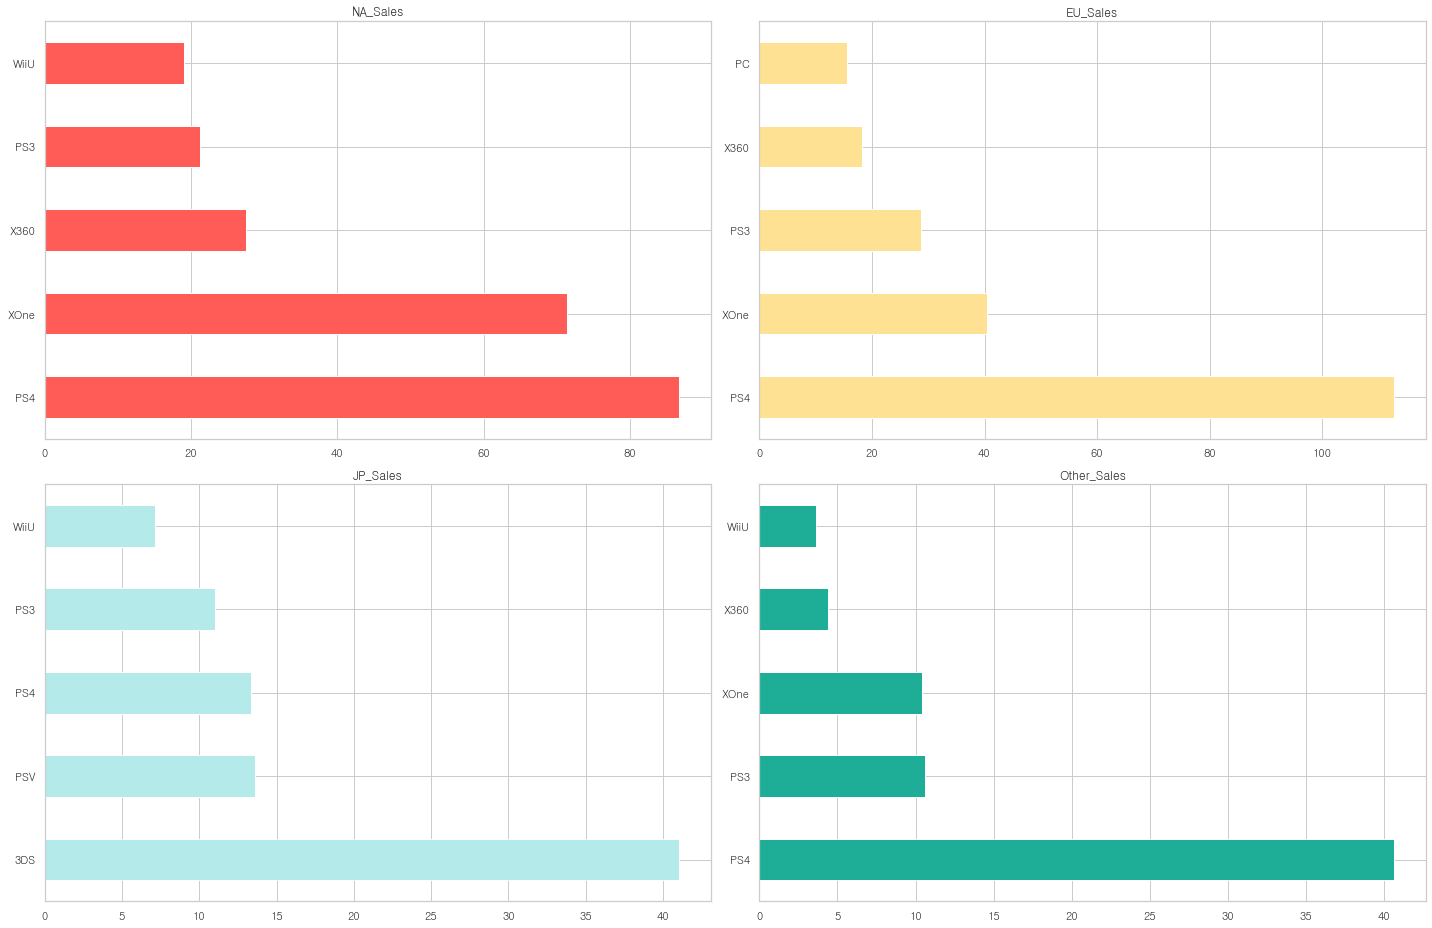

In [115]:
fig, ax = plt.subplots(2,2,figsize=[20,13])

for i, color in enumerate(colors):
    
    x, y = int(i/2), i%2
    
    (games[games['Year']>=2014].pivot_table(index='Platform',values=sales,aggfunc='sum').sort_values(by=sales[i],ascending=False)[sales[i]]
     .head().plot(kind='barh',ax=ax[x,y],color=color, title=sales[i]))


    ax[x,y].set_ylabel('')

plt.tight_layout()
plt.show()

- NA<br>
PS4, Xone을 선호하는 경향을 보임
<br>
<br>
- EU, Other<br>
PS4의 선호도가 압도적으로 높은 것으로 보임
<br>
<br>
- JP<br>
3DS의 선호도가 압도적으로 높은 것으로 보임

# 최종 결론
- NA
 - 2014~2015년를 기점으로 Shooter 장르의 인기가 상승하였으나 Action 장르도 여전히 강세를 보이고 있음
 - Call of Duty series, GTA series 같은 Series물을 선호함
 - 최신 Console 플랫폼 선호
 - 따라서 Shooter, Action 장르의 Series물을 최신 Console 플랫폼에서 플레이할 수 있도록 게임을 출시하는 것이 좋을 것으로 판단됨
<br>
<br>
- EU, Other
 - 2015년을 기점으로 Shooter 장르의 인기가 상승하였으나 Action 장르도 여전히 강세를 보이고 있음
 - 2016년을 기점으로 Sports 장르의 인기 또한 Action 장르를 앞지르는 것으로 보임
 - 지역적 특성으로 인하여 축구관련 게임의 선호도가 높은 것으로 보임
 - 최신 Console 플랫폼 선호
 - 따라서 Shooter, Action 장르의 Series물 뿐만아니라 축구관련 게임을 최신 Console 플랫폼에서 플레이 할 수 있도록 게임을 출시하는 것이 좋을 것으로 판단됨
 - 다만 Other의 경우 너무 많은 지역이 포함되어있기 때문에 지역을 좀 더 나눠서 세부적으로 분석해야될 필요가 있어보임
<br>
<br>
- JP
 - Role-Playing 장르가 꾸준한 인기를 보이고 있으며, 최근들어 Action 장르의 인기가 높아진 것으로 보임
 - Console 플랫폼 중에서도 휴대할 수 있는 종류를 선호함
 - Role-Playing, Action 장르의 게임(특히 Pokemon, Super Mario 관련 Series)을 휴대용 Console 플랫폼에서 플레이 할 수 있도록 게임을 출시하는 것이 좋을 것으로 판단됨